In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import os
import pydot
from scipy.spatial import distance
%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [2]:
tf.__version__

'1.14.0'

In [3]:
def lotka_voltera(var, t, alpha, betta, delta, gamma):
    x, y = var
    dx = alpha*x -betta*x*y
    dy = delta*x*y - gamma*y
    return [dx, dy]

In [4]:
alpha = 2/3
betta = 4/3
delta = 1
gamma = 1
t = np.linspace(0, 20, 100)
#var0 = [0.7, 0.3]
#var0 = [0.06, 0.23401]
var0 = [0.74, 0.26]

In [5]:
solve = integrate.odeint(lotka_voltera, var0, t, (alpha, betta, delta, gamma))
solve

array([[0.74      , 0.26      ],
       [0.79075817, 0.24793957],
       [0.84738806, 0.2390171 ],
       [0.9098775 , 0.23320515],
       [0.97809091, 0.23055925],
       [1.05170237, 0.23123407],
       [1.13010981, 0.2355025 ],
       [1.21232631, 0.24377794],
       [1.29684687, 0.25663799],
       [1.38149434, 0.27484468],
       [1.46325974, 0.29935004],
       [1.53817233, 0.33126625],
       [1.60126826, 0.37176541],
       [1.64676769, 0.42186059],
       [1.6685989 , 0.4820212 ],
       [1.66137819, 0.55161759],
       [1.62179511, 0.62830418],
       [1.55004678, 0.7076215 ],
       [1.45065628, 0.78320541],
       [1.33202739, 0.84784023],
       [1.20465477, 0.89512147],
       [1.07871626, 0.92102112],
       [0.96212576, 0.92463654],
       [0.85971322, 0.90790665],
       [0.77346803, 0.87464014],
       [0.70334471, 0.8293993 ],
       [0.64813861, 0.77662478],
       [0.60616699, 0.72012636],
       [0.57569727, 0.66288858],
       [0.55516964, 0.60707971],
       [0.

([array([ 0.,  0., 23., 13.,  9.,  9.,  9.,  9.,  9., 19.]),
  array([47., 14., 11., 12., 16.,  0.,  0.,  0.,  0.,  0.])],
 array([0.23040295, 0.37433105, 0.51825914, 0.66218723, 0.80611532,
        0.95004342, 1.09397151, 1.2378996 , 1.38182769, 1.52575579,
        1.66968388]),
 <a list of 2 Lists of Patches objects>)

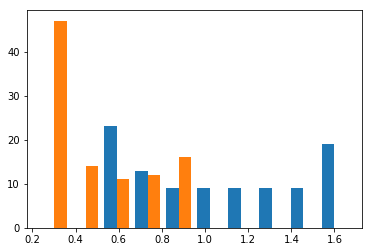

In [6]:
plt.hist(solve)

In [117]:
m1 = np.max(solve, axis=0)
#solve = solve/m
solve.shape

(200, 2)

In [8]:
solve_norm = solve
x = []
y = []
for i in range(len(solve_norm)-1):
    x.append(solve_norm[i])
    y.append(solve_norm[i+1])
x = np.stack(x)
y = np.stack(y)

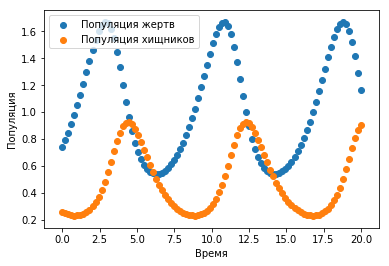

In [10]:
fig, ax = plt.subplots()
ax.scatter(t, solve[:, 0], label="Популяция жертв")
ax.scatter(t, solve[:, 1], label="Популяция хищников")
ax.set_xlabel("Время")
ax.set_ylabel("Популяция")
plt.legend()
plt.savefig("model2.svg", dpi=200)

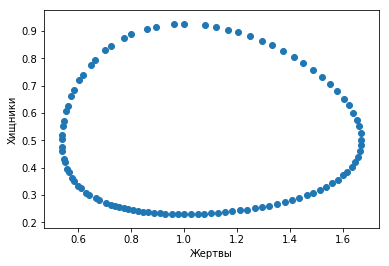

In [11]:
fig, ax = plt.subplots()
ax.scatter(solve[:, 0], solve[:, 1])
ax.set_xlabel("Жертвы")
ax.set_ylabel("Хищники")
plt.savefig("portret.svg", dpi=200)

In [200]:
class ResBlock(keras.layers.Layer):
    def __init__(self, nunits, nhiden_layers=2, activation = 'relu'):
        self.nunits = nunits
        self.nlayers = nhiden_layers
        self.activation = activation
    def __call__(self, x):
        inputs = x
        hiden = inputs
        for i in range(self.nlayers):
            layer = keras.layers.Dense(self.nunits, self.activation)
            hiden = layer(hiden)
        return keras.layers.add([hiden, inputs])

In [201]:
nunits = 16
inputs = keras.layers.Input(shape=(2,))
dense1 = keras.layers.Dense(nunits, 'relu')(inputs)
res1 = ResBlock(nunits)(dense1)
res2 = ResBlock(nunits)(res1)
outputs = keras.layers.Dense(2, 'linear')(res2)

In [202]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="Adam", loss="mse")
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 16)           48          input_14[0][0]                   
__________________________________________________________________________________________________
dense_49 (Dense)                (None, 16)           272         dense_48[0][0]                   
__________________________________________________________________________________________________
dense_50 (Dense)                (None, 16)           272         dense_49[0][0]                   
____________________________________________________________________________________________

In [203]:
h = model.fit(x=x, y=y, epochs=200)

Epoch 1/200
99/99 [==============================] - 0s 3ms/sample - loss: 0.6261
Epoch 2/200
99/99 [==============================] - 0s 30us/sample - loss: 0.5420
Epoch 3/200
99/99 [==============================] - 0s 51us/sample - loss: 0.4785
Epoch 4/200
99/99 [==============================] - 0s 40us/sample - loss: 0.4290
Epoch 5/200
99/99 [==============================] - 0s 51us/sample - loss: 0.3922
Epoch 6/200
99/99 [==============================] - 0s 40us/sample - loss: 0.3591
Epoch 7/200
99/99 [==============================] - 0s 40us/sample - loss: 0.3313
Epoch 8/200
99/99 [==============================] - 0s 40us/sample - loss: 0.3074
Epoch 9/200
99/99 [==============================] - 0s 40us/sample - loss: 0.2852
Epoch 10/200
99/99 [==============================] - 0s 40us/sample - loss: 0.2669
Epoch 11/200
99/99 [==============================] - 0s 40us/sample - loss: 0.2485
Epoch 12/200
99/99 [==============================] - 0s 30us/sample - loss: 0.2307
Ep

Epoch 97/200
99/99 [==============================] - 0s 30us/sample - loss: 9.6649e-05
Epoch 98/200
99/99 [==============================] - 0s 40us/sample - loss: 9.4648e-05
Epoch 99/200
99/99 [==============================] - 0s 30us/sample - loss: 8.9884e-05
Epoch 100/200
99/99 [==============================] - 0s 51us/sample - loss: 8.6887e-05
Epoch 101/200
99/99 [==============================] - 0s 40us/sample - loss: 8.3936e-05
Epoch 102/200
99/99 [==============================] - 0s 51us/sample - loss: 8.1923e-05
Epoch 103/200
99/99 [==============================] - 0s 40us/sample - loss: 7.8336e-05
Epoch 104/200
99/99 [==============================] - 0s 30us/sample - loss: 7.6278e-05
Epoch 105/200
99/99 [==============================] - 0s 30us/sample - loss: 7.3968e-05
Epoch 106/200
99/99 [==============================] - 0s 40us/sample - loss: 8.0299e-05
Epoch 107/200
99/99 [==============================] - 0s 40us/sample - loss: 8.0736e-05
Epoch 108/200
99/99 [===

99/99 [==============================] - 0s 30us/sample - loss: 1.5297e-05
Epoch 190/200
99/99 [==============================] - 0s 40us/sample - loss: 1.5538e-05
Epoch 191/200
99/99 [==============================] - 0s 40us/sample - loss: 1.4654e-05
Epoch 192/200
99/99 [==============================] - 0s 40us/sample - loss: 1.3709e-05
Epoch 193/200
99/99 [==============================] - 0s 30us/sample - loss: 1.3916e-05
Epoch 194/200
99/99 [==============================] - 0s 40us/sample - loss: 1.3603e-05
Epoch 195/200
99/99 [==============================] - 0s 40us/sample - loss: 1.3155e-05
Epoch 196/200
99/99 [==============================] - 0s 30us/sample - loss: 1.3292e-05
Epoch 197/200
99/99 [==============================] - 0s 30us/sample - loss: 1.5118e-05
Epoch 198/200
99/99 [==============================] - 0s 40us/sample - loss: 1.5134e-05
Epoch 199/200
99/99 [==============================] - 0s 40us/sample - loss: 1.4401e-05
Epoch 200/200
99/99 [==============

In [45]:
#p = [np.array([0.4, 0.25]/m)]
p = [np.array(var0)]
for i in range(t.shape[0]-1):
    p.append(model.predict(np.array([p[-1]]))[0])
p = np.stack(p)
p

array([[ 0.74      ,  0.26      ],
       [ 0.76613879,  0.22537713],
       [ 0.79746217,  0.19131307],
       [ 0.83455741,  0.15744458],
       [ 0.87733507,  0.12464873],
       [ 0.92537916,  0.09400599],
       [ 0.97792608,  0.06704889],
       [ 1.03456104,  0.04434075],
       [ 1.09522688,  0.0246547 ],
       [ 1.16060388,  0.00675996],
       [ 1.23098636, -0.00953614],
       [ 1.30606461, -0.0235909 ],
       [ 1.38463604, -0.03459583],
       [ 1.46621418, -0.0420391 ],
       [ 1.55024135, -0.04635162],
       [ 1.63611281, -0.04857032],
       [ 1.72285891, -0.04762314],
       [ 1.80953932, -0.04330507],
       [ 1.89413893, -0.0367114 ],
       [ 1.97597718, -0.02818926],
       [ 2.05408216, -0.01782312],
       [ 2.12752938, -0.00550674],
       [ 2.19592309,  0.00842454],
       [ 2.25904608,  0.02349109],
       [ 2.31719065,  0.0390579 ],
       [ 2.37060022,  0.05496357],
       [ 2.41941953,  0.07120888],
       [ 2.4637804 ,  0.08751846],
       [ 2.50384593,

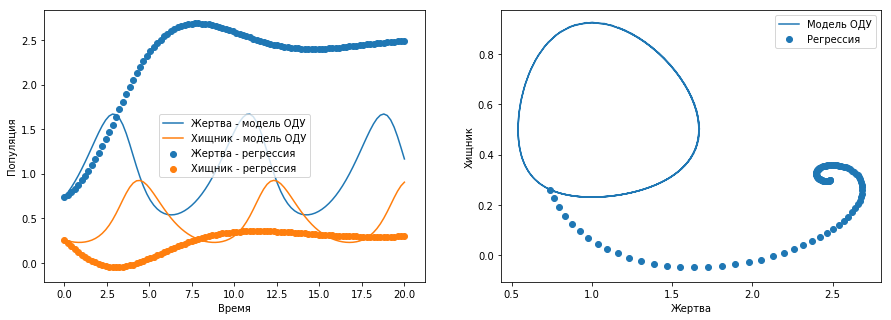

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(t, p[:,0], label="Жертва - регрессия")
ax[0].scatter(t, p[:,1], label="Хищник - регрессия")
ax[0].plot(t, solve[:,0], label='Жертва - модель ОДУ')
ax[0].plot(t, solve[:,1], label='Хищник - модель ОДУ')
ax[1].plot(solve[:,0], solve[:,1], label="Модель ОДУ")
ax[1].scatter(p[:,0], p[:,1], label="Регрессия")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Время")
ax[0].set_ylabel("Популяция")
ax[1].set_xlabel("Жертва")
ax[1].set_ylabel("Хищник")
plt.savefig("predict_covareate_shift2.pdf", dpi=200)
plt.savefig("predict_covareate_shift2.png", dpi=200)

## Расчет относительной ошибки аппроксимации на каждом шаге предсказания

In [57]:
def rae_metric(x, y):
    return np.abs(x-y)/np.abs(y)


In [60]:
p.shape, solve.shape

((200, 2), (200, 2))

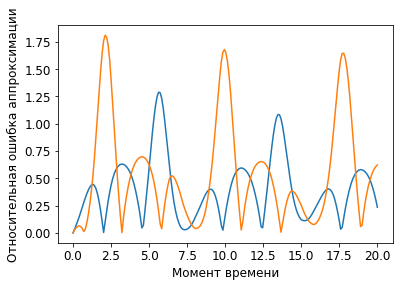

In [158]:
rae_values = rae_metric(p, solve)
plt.plot(t, rae_values);
plt.xlabel("Момент времени")
plt.ylabel("Относительная ошибка аппроксимации")
plt.savefig("relative_error_approx.pdf")

In [77]:
rae_values.mean(axis=1)

array([0.        , 0.00040455, 0.00129264, 0.00241531, 0.00342507,
       0.0043849 , 0.00533541, 0.00632045, 0.0073156 , 0.00841193,
       0.00980645, 0.01114011, 0.01254576, 0.01449944, 0.01614858,
       0.01872062, 0.02038484, 0.02083957, 0.02103726, 0.0215471 ,
       0.02248   , 0.02406377, 0.02579937, 0.02764482, 0.02938395,
       0.03065783, 0.03113947, 0.03127671, 0.03118769, 0.03082573,
       0.03013829, 0.02926769, 0.0278568 , 0.02599742, 0.0237555 ,
       0.02125197, 0.01773978, 0.02013475, 0.02209357, 0.02325872,
       0.02395179, 0.02421095, 0.02396432, 0.02335724, 0.02252444,
       0.02143507, 0.02027704, 0.01937067, 0.0184692 , 0.01980595,
       0.02289428, 0.0254577 , 0.02760743, 0.02939192, 0.03068153,
       0.0312559 , 0.03140064, 0.03133138, 0.03124694, 0.03162664,
       0.03262368, 0.03363836, 0.03454266, 0.03505665, 0.03485275,
       0.034185  , 0.03351515, 0.03272744, 0.03461781, 0.03707254,
       0.039748  , 0.04256389, 0.04582015, 0.04912569, 0.05229

In [273]:
plt.legend?

In [ ]:
ax[0].legend

In [151]:
solve[:,0]

array([0.18384923, 0.2296656 , 0.28892211, 0.36475123, 0.46050765,
       0.57886805, 0.71916641, 0.86982707, 0.98903004, 0.97724506,
       0.74539323, 0.43504804, 0.23649747, 0.14361163, 0.1029665 ,
       0.08600557, 0.08107419, 0.08362921, 0.09207058, 0.10617283,
       0.12649762, 0.1541839 , 0.19089343, 0.23881831, 0.30069043,
       0.37970982, 0.47920697, 0.6015529 , 0.74496181, 0.89449   ,
       1.        , 0.95295901, 0.69009677, 0.39112747, 0.21471389,
       0.1340143 , 0.09882891, 0.08448423, 0.08104989, 0.08468093,
       0.09408556, 0.10920048, 0.13069552, 0.15980087, 0.19826812,
       0.24838249, 0.3129656 , 0.39527606, 0.49859074, 0.62488831])

# Генерация обучающей выборки

In [8]:
class LogicError(Exception):
    pass

class DynamicModel:
    def __init__(self, name, started_states):
        self.__name = name
        self.__states = started_states
    @property
    def name(self):
        return self.__name
    def setArgs(self, args):
        raise NotImplementedError;
    @property
    def args(self):
        raise NotImplementedError;
    @property
    def started_states(self):
        return self.__states
    def __call__(self, var, t):
        raise NotImplementedError;

In [9]:
## Модель лотки вольтера
class LotkaVoltera (DynamicModel):
    def __init__(self, alpha, beta, delta, gamma, started_states):
        super().__init__("Модель Лотки Волтера", started_states)
        self.setArgs([alpha, beta, delta, gamma])
    def setArgs(self, args):
        if (len(args) != 4):
            raise LogicError
        self.__alpha = args[0]
        self.__beta = args[1]
        self.__delta = args[2]
        self.__gamma = args[3]
    @property
    def args(self):
        return {"alpha": self.__alpha, "beta": self.__beta, 
                "delta": self.__delta, "gamma": self.__gamma} 
    def __call__(self, var, t):
        x, y = var
        dx = self.__alpha*x - self.__beta*x*y
        dy = self.__delta*x*y - self.__gamma*y
        return [dx, dy]

# Модель атрактор Лоренца  
class LorenzSystem (DynamicModel):
    def __init__(self, ro, r, b, started_states):
        super().__init__("Система Лоренца")
        self.setArgs([ro, r, b])
    def setArgs(self, args):
        self.__ro = args[0]
        self.__r = args[1]
        self.__b = args[2]
    
    @property
    def args(self, t):
        return {"ro": self.__ro, "r": self.__r, 
                "b": self.__b} 
    def __call__(self, var, t):
        x, y, z = variabels
        dx = self.__ro*(y-x)
        dy = x*(self.__r-z)-y
        dz = x*y-self.__b*z
        return [dx, dy, dz]

In [10]:
value = np.around(np.linspace(0.05, 1, 10), 3)
state = []
for i in value:
    for j in value:
        if i > j and i != 0:
            state.append((i, j))
m = LotkaVoltera(2/3, 4/3, 1, 1, state)
m.started_states

[(0.156, 0.05),
 (0.261, 0.05),
 (0.261, 0.156),
 (0.367, 0.05),
 (0.367, 0.156),
 (0.367, 0.261),
 (0.472, 0.05),
 (0.472, 0.156),
 (0.472, 0.261),
 (0.472, 0.367),
 (0.578, 0.05),
 (0.578, 0.156),
 (0.578, 0.261),
 (0.578, 0.367),
 (0.578, 0.472),
 (0.683, 0.05),
 (0.683, 0.156),
 (0.683, 0.261),
 (0.683, 0.367),
 (0.683, 0.472),
 (0.683, 0.578),
 (0.789, 0.05),
 (0.789, 0.156),
 (0.789, 0.261),
 (0.789, 0.367),
 (0.789, 0.472),
 (0.789, 0.578),
 (0.789, 0.683),
 (0.894, 0.05),
 (0.894, 0.156),
 (0.894, 0.261),
 (0.894, 0.367),
 (0.894, 0.472),
 (0.894, 0.578),
 (0.894, 0.683),
 (0.894, 0.789),
 (1.0, 0.05),
 (1.0, 0.156),
 (1.0, 0.261),
 (1.0, 0.367),
 (1.0, 0.472),
 (1.0, 0.578),
 (1.0, 0.683),
 (1.0, 0.789),
 (1.0, 0.894)]

In [11]:
def create_train1step(data):
    x = []
    y = []
    for i in range(len(data)-1):
        x.append(data[i])
        y.append(data[i+1])
    return np.stack(x), np.stack(y)

def make_train_of_model(dynamic_model, t, space_distance):
    x = []
    y = []
    for start in dynamic_model.started_states:
        solve = integrate.odeint(dynamic_model, start , t)
        original_space_size = solve.shape[1]
        #solve, rtime = reduce_space(solve, t, space_distance)
        #solve = solve[:, 0:original_space_size]
        val = create_train1step(solve)
        for i in range(len(val[0])):
            x.append(val[0][i])
            y.append(val[1][i])
    return np.stack(x), np.stack(y)

In [17]:
(X, Y) = make_train_of_model(m, np.linspace(0, 20, 50))
(X, Y) = (X, Y)/np.max((X, Y))

TypeError: make_train_of_model() missing 1 required positional argument: 'space_distance'

In [152]:
X

array([[0.03634475, 0.01164896],
       [0.04662239, 0.00832539],
       [0.06019213, 0.00607491],
       ...,
       [0.14938733, 0.07621991],
       [0.16605411, 0.06675375],
       [0.18799625, 0.06047365]])

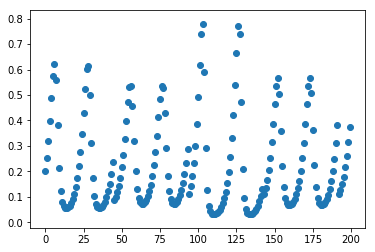

In [134]:
plt.scatter([i for i in range(200)],X[200:400, 0])

# Поиск оптимального размера шага

In [94]:
state = [(0.5, 0.12)]
dynamic_model = LotkaVoltera(2/3, 4/3, 1, 1, state)
t = np.arange(0, 20, 0.001)
solve = integrate.odeint(dynamic_model, state[0], t)

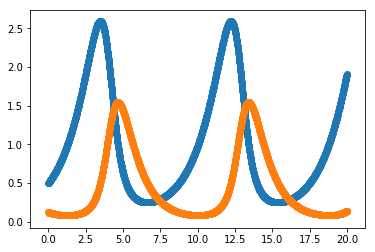

In [66]:
plt.scatter(t, solve[:,0])
plt.scatter(t, solve[:,1])

In [14]:
x = []
for i in range(0, len(t)):
    x.append([solve[i, 0], t[i]])
x = np.stack(x)
max_distance = 0
for i in range(len(t)-1):
    d = distance.euclidean(x[i], x[i+1])
    if d > max_distance:
        max_distance = d
max_distance

0.02164347764632477

In [126]:
max_distance = 0.2

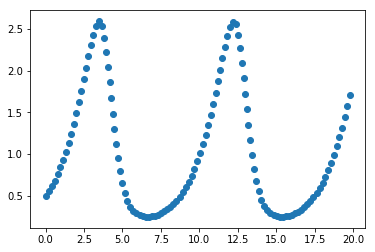

In [127]:
reduce = []
new_i = 0;
for i in range(len(t)):
    i = new_i
    for j in range(i+1, len(t)):
        d = distance.euclidean(x[i], x[j])
        if (d >= max_distance):
            reduce.append(x[i])
            new_i = j
            break
reduce =  np.stack(reduce)
reduce
plt.scatter(reduce[:, 1], reduce[:, 0])

In [128]:
for i in range(reduce.shape[0]-1):
    print(distance.euclidean(reduce[i], reduce[i+1]))

0.20720122237820357
0.20927605827763443
0.20119451929011783
0.20403881320384817
0.2074845161925448
0.2003637667437158
0.20471044331304705
0.20972976035794316
0.2032846476436775
0.20883841068011982
0.20192439432969758
0.20717095692535073
0.21206992211166656
0.20243972389493328
0.20446134200550087
0.20409838758459953
0.2002007365637477
0.2039167719605417
0.209890661786506
0.2060172275471815
0.20856924395744658
0.2140631451120613
0.20090574158388919
0.21190030244586303
0.20873439509277583
0.21567264942534908
0.21432297158122932
0.20603223748080804
0.21150710032827708
0.2095208081877681
0.20238647300084026
0.20655945667078612
0.20858560792689185
0.2022346229503469
0.20188898085038418
0.20593734165455715
0.20265504905561577
0.2010971052852142
0.20037771080917763
0.2000777563562243
0.20000002823519047
0.20005270312206186
0.20019538615400395
0.2004141891196733
0.2007102389202062
0.2010945209612943
0.20158582149557225
0.2022102656026191
0.2030017320158237
0.20400275940913126
0.2052657000703941

In [12]:
def convert_to_timed_space(space, time):
    x = []
    for i in range(0, len(time)):
        x.append(np.append(space[i], time[i]))
    return np.stack(x)

def reduce_space(space, time, max_distance):
    x = convert_to_timed_space(space, time)
    #x = space
    reduce = []
    rtime = []
    new_i = 0;
    for i in range(len(time)-1):
        i = new_i
        for j in range(i+1, len(time)):
            d = distance.euclidean(x[i], x[j])
            if (d >= max_distance):
                reduce.append(x[i])
                rtime.append(time[i])
                new_i = j
                break
    return np.stack(reduce), np.stack(rtime)
    
    

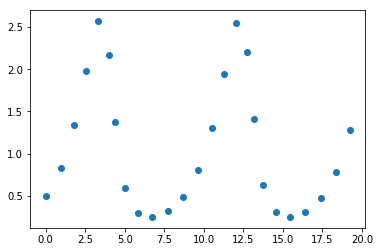

In [98]:
r, rtime = reduce_space(solve, t, 1)
# print(r)
# print(r.shape)
plt.scatter(rtime, r[:, 0])
#plt.scatter([i for i in range(len(r[:, 1]))], r[:, 1])

(array([7., 4., 3., 0., 4., 1., 0., 2., 2., 2.]),
 array([0.2499178 , 0.48162295, 0.7133281 , 0.94503325, 1.1767384 ,
        1.40844355, 1.6401487 , 1.87185384, 2.10355899, 2.33526414,
        2.56696929]),
 <a list of 10 Patch objects>)

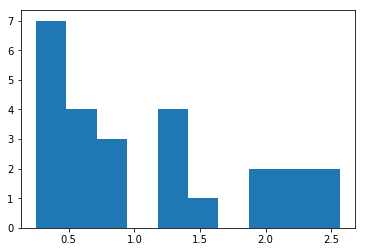

In [96]:
plt.hist(r)

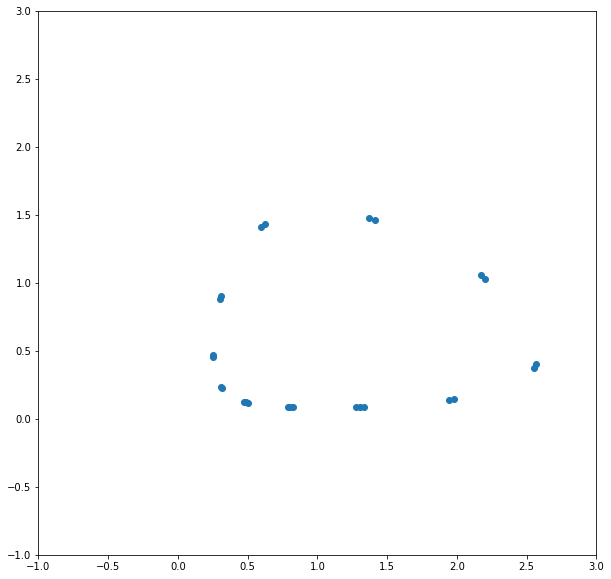

In [99]:
plt.figure(figsize=(10,10))
plt.xlim(-1, 3)
plt.ylim(-1, 3)

plt.scatter(r[:, 0], r[:, 1])

# Генерация моделей

In [13]:
class Ann:
    _delimetr = "_"
    def _as_str(self, key, value):
        return key + "{" + str(value) + "}"
    def _start_name(self):
        return "MODEL"
    @property
    def name(self):
        raise NotImplementedError;

In [14]:
class ResBlock (keras.layers.Layer):
    def __init__(self, nunits, size, activation, regularization = None):
        """nunits - число нейронов в слое
        size - размер блока
        activation - функция активации"""
        self.__nunits = nunits
        self.__nlayers = size
        self.__activation = activation
        self.__regularization = regularization
    def __call__(self, x):
        inputs = x
        hiden = inputs
        for i in range(self.__nlayers):
            layer = keras.layers.Dense(self.__nunits, self.__activation, kernel_regularizer = self.__regularization)
            hiden = layer(hiden)
        return keras.layers.add([hiden, inputs])

class ResNet (Ann):
    def __init__(self, shape_input, shape_output, nunits, nblocks, size, activation, regularization = None):
        """
        shape_input - размерность входа
        shape_output - размерность выхода
        nunits - число нейронов в скрытом слое
        nblocks - число ResNet блоков
        size - число слоев в ResNet блоке
        activation - функция активации
        regularization - регулиризация
        """
        inputs = keras.layers.Input(shape = shape_input)
        layer = keras.layers.Dense(nunits, activation, kernel_regularizer = regularization)(inputs)
        for i in range(nblocks):
            layer = ResBlock(nunits, size, activation)(layer)
        outputs = keras.layers.Dense(shape_output, "linear")(layer)
        self.__inputs = inputs;
        self.__outputs = outputs;
        self.__shape_input = shape_input
        self.__shape_output = shape_output
        self.__nunits = nunits
        self.__nblocks = nblocks
        self.__size = size
        self.__activation = activation
    
    @property
    def inputs(self):
        return self.__inputs
    
    @property
    def outputs(self):
        return self.__outputs
    
    @property
    def name(self):
        s = self._start_name()
        s = s + Ann._delimetr + self._as_str("name", "resnet")
        s = s + Ann._delimetr + self._as_str("nlayers", self.__nblocks*self.__size+2)
        s = s + Ann._delimetr + self._as_str("nunits", self.__nunits)
        return s

In [15]:
class RelativeApproximationError(tf.keras.metrics.Metric):
    def __init__(self, name='RAE', **kwargs):
        super(RelativeApproximationError, self).__init__(name=name, **kwargs)
        self.value = self.add_weight(name='value',
                                     dtype = tf.float32, initializer='zeros')
        self.num = self.add_weight(name='num', 
                                   dtype = tf.float32, initializer='ones')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
            val =tf.math.abs(tf.math.subtract(y_true, y_pred, name="val"))
            self.value.assign_add(tf.math.reduce_sum(tf.math.divide(val, y_true)), name="value")
            self.num.assign_add(1, name="num")
        
    def result(self):
        return self.value / self.num
    
    def reset_states(self):
        self.value = 0;
        self.num = 0;

In [16]:
rae = RelativeApproximationError()
rae.update_state([[0.5], [0.6]], [[0.45], [0.5]])

<tf.Operation 'PartitionedFunctionCall' type=StatefulPartitionedCall>

In [22]:
#tf.Variable?
a = ResNet((2,), 2, 16, 2, 2, "relu")

W1214 19:18:09.387818    32 deprecation.py:506] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [178]:
model = keras.Model(inputs=a.inputs, outputs=a.outputs)
model.compile(optimizer="Adam", loss="mse", metrics=[RelativeApproximationError()])
model.summary()

Model: "model_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_126 (Dense)               (None, 16)           48          input_22[0][0]                   
__________________________________________________________________________________________________
dense_127 (Dense)               (None, 16)           272         dense_126[0][0]                  
__________________________________________________________________________________________________
dense_128 (Dense)               (None, 16)           272         dense_127[0][0]                  
___________________________________________________________________________________________

In [12]:
tf.keras.utils.plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [14]:
tf.keras.utils.plot_model?

In [179]:
h = model.fit(X, Y, epochs=1000, batch_size=256)

Epoch 1/1000
2205/2205 [==============================] - 1s 331us/sample - loss: 0.0190 - RAE: 335.0340
Epoch 2/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 0.0076 - RAE: 394.8924
Epoch 3/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 0.0065 - RAE: 383.4668
Epoch 4/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 0.0055 - RAE: 356.3397
Epoch 5/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 0.0045 - RAE: 342.1541
Epoch 6/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 0.0037 - RAE: 331.4370
Epoch 7/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 0.0029 - RAE: 317.2187
Epoch 8/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 0.0022 - RAE: 303.9184
Epoch 9/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 0.0017 - RAE: 292.0103
Epoch 10/1000
2205/2205 [==============================] - 0s 5us/sampl

2205/2205 [==============================] - 0s 5us/sample - loss: 1.2490e-05 - RAE: 47.0490
Epoch 154/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.2579e-05 - RAE: 46.8427
Epoch 155/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 1.2723e-05 - RAE: 46.6394
Epoch 156/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.2815e-05 - RAE: 46.4397
Epoch 157/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.2239e-05 - RAE: 46.2406
Epoch 158/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.2021e-05 - RAE: 46.0435
Epoch 159/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.2090e-05 - RAE: 45.8491
Epoch 160/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.1745e-05 - RAE: 45.6556
Epoch 161/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.2007e-05 - RAE: 45.4653
Epoch 162/1000
2205/2205 [=================

Epoch 229/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 7.8426e-06 - RAE: 36.1754
Epoch 230/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 7.8501e-06 - RAE: 36.0745
Epoch 231/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 7.9480e-06 - RAE: 35.9759
Epoch 232/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 7.5285e-06 - RAE: 35.8758
Epoch 233/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 7.3716e-06 - RAE: 35.7758
Epoch 234/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 7.2327e-06 - RAE: 35.6763
Epoch 235/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 7.2081e-06 - RAE: 35.5776
Epoch 236/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 7.0830e-06 - RAE: 35.4801
Epoch 237/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 7.3074e-06 - RAE: 35.3827
Epoch 238/1000
2205/2205 [==

Epoch 380/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 3.5952e-06 - RAE: 25.7348
Epoch 381/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 3.6405e-06 - RAE: 25.6869
Epoch 382/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 3.7751e-06 - RAE: 25.6404
Epoch 383/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 3.9644e-06 - RAE: 25.5935
Epoch 384/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 3.8028e-06 - RAE: 25.5472
Epoch 385/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 4.0421e-06 - RAE: 25.5023
Epoch 386/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 3.9838e-06 - RAE: 25.4564
Epoch 387/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 3.9047e-06 - RAE: 25.4100
Epoch 388/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 4.0244e-06 - RAE: 25.3653
Epoch 389/1000
2205/2205 [==

Epoch 531/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.3007e-06 - RAE: 20.4084
Epoch 532/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.7291e-06 - RAE: 20.3818
Epoch 533/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.9042e-06 - RAE: 20.3556
Epoch 534/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.3759e-06 - RAE: 20.3286
Epoch 535/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.6959e-06 - RAE: 20.3020
Epoch 536/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 2.8366e-06 - RAE: 20.2763
Epoch 537/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 3.2434e-06 - RAE: 20.2507
Epoch 538/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 3.5521e-06 - RAE: 20.2255
Epoch 539/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 3.3848e-06 - RAE: 20.2005
Epoch 540/1000
2205/2205 [==

Epoch 682/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.6974e-06 - RAE: 17.1654
Epoch 683/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.8912e-06 - RAE: 17.1484
Epoch 684/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.9347e-06 - RAE: 17.1315
Epoch 685/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.3748e-06 - RAE: 17.1155
Epoch 686/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 2.1371e-06 - RAE: 17.0992
Epoch 687/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.3677e-06 - RAE: 17.0825
Epoch 688/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.9906e-06 - RAE: 17.0653
Epoch 689/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.1093e-06 - RAE: 17.0480
Epoch 690/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.6314e-06 - RAE: 17.0315
Epoch 691/1000
2205/2205 [==

Epoch 833/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 1.8355e-06 - RAE: 15.0370
Epoch 834/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.1763e-06 - RAE: 15.0262
Epoch 835/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.7778e-06 - RAE: 15.0146
Epoch 836/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 1.7000e-06 - RAE: 15.0027
Epoch 837/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.0653e-06 - RAE: 14.9912
Epoch 838/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.3442e-06 - RAE: 14.9799
Epoch 839/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.2790e-06 - RAE: 14.9688
Epoch 840/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.6373e-06 - RAE: 14.9566
Epoch 841/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 1.6944e-06 - RAE: 14.9449
Epoch 842/1000
2205/2205 [==

Epoch 984/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.4632e-06 - RAE: 13.5106
Epoch 985/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 1.5569e-06 - RAE: 13.5017
Epoch 986/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 1.4688e-06 - RAE: 13.4931
Epoch 987/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.5874e-06 - RAE: 13.4871
Epoch 988/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 3.0634e-06 - RAE: 13.4811
Epoch 989/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 2.6248e-06 - RAE: 13.4738
Epoch 990/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.3793e-06 - RAE: 13.4666
Epoch 991/1000
2205/2205 [==============================] - 0s 4us/sample - loss: 2.3538e-06 - RAE: 13.4596
Epoch 992/1000
2205/2205 [==============================] - 0s 5us/sample - loss: 2.2695e-06 - RAE: 13.4515
Epoch 993/1000
2205/2205 [==

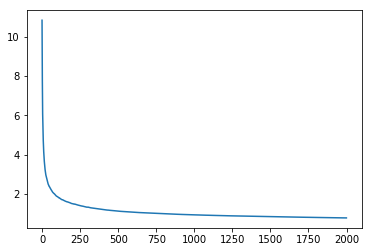

In [156]:
plt.plot([i for i in range(len(h.history["loss"]))], h.history["RAE"])

In [17]:
class BinaryTruePositives(tf.keras.metrics.Metric):
    def __init__(self, name='binary_true_positives', **kwargs):
        super(BinaryTruePositives, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.bool)
        y_pred = tf.cast(y_pred, tf.bool)
        
        values = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
        values = tf.cast(values, self.dtype)
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, self.dtype)
            values = tf.multiply(values, sample_weight)
            self.true_positives.assign_add(tf.reduce_sum(values))
    
    def result(self):
        return self.true_positives
    
    def reset_states(self):
        self.true_positives.assign(0)

# Эксперементы

In [18]:
#Формируем модель и список начальных состояний
num_states = 50 #число начальных состояний
t_start = 0
t_stop = 20
value = np.around(np.linspace(0.05, 1, num_states), 3)
state = []
for i in value:
    for j in value:
        if i > j and i != 0:
            state.append((i, j))
state_train = state[0::2]
state_test = state[1::2]
m_train = LotkaVoltera(2/3, 4/3, 1, 1, state_train)
m_test = LotkaVoltera(2/3, 4/3, 1, 1, state_test)
#t = np.arange(t_start, t_stop, 0.1)
t = np.linspace(t_start, t_stop, 100)
space_distance = 10

#Формируем обучающую выборку
(X, Y) = make_train_of_model(m_train, t, space_distance)
x_max = np.max(X, axis=0);
#y_max = np.max(Y,  axis=0);
#X = X/x_max
#Y = Y/x_max
X.shape

#Формируем тестовую выборку
(X_test, Y_test) = make_train_of_model(m_test, t, space_distance)
#X_test = X_test/np.max(X_test, axis=0)
#Y_test =  Y_test/np.max( Y_test,  axis=0)

In [19]:
X

array([[0.069     , 0.05      ],
       [0.07798417, 0.04146413],
       [0.08832229, 0.03445254],
       ...,
       [0.65953912, 0.25974031],
       [0.70522053, 0.24357263],
       [0.75702096, 0.2306708 ]])

In [149]:
#формируем нейросетевую модель
ann = ResNet((2,), 2, 64, 3, 2, keras.layers.LeakyReLU(), None)
model = keras.Model(inputs=ann.inputs, outputs=ann.outputs)
model.compile(optimizer=keras.optimizers.Adadelta()
              , loss="mse", metrics=['mae',RelativeApproximationError()])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_68 (Dense)                (None, 64)           192         input_12[0][0]                   
__________________________________________________________________________________________________
dense_69 (Dense)                (None, 64)           4160        dense_68[0][0]                   
__________________________________________________________________________________________________
dense_70 (Dense)                (None, 64)           4160        dense_69[0][0]                   
____________________________________________________________________________________________

In [150]:
#обучаем модель
saver = tf.keras.callbacks.ModelCheckpoint(
                            filepath="./models/resnet/model.hdf5",
                            save_weights_only=True,
                            monitor='val_RAE',
                            mode='min',
                            save_best_only=True)
h = model.fit(X, Y, batch_size=32, epochs=500, 
             validation_data = [X_test, Y_test])

Train on 60687 samples, validate on 60588 samples
Epoch 1/500
60687/60687 [==============================] - 3s 42us/sample - loss: 0.2634 - mean_absolute_error: 0.3810 - RAE: 63.2248 - val_loss: 0.0757 - val_mean_absolute_error: 0.1938 - val_RAE: 52.9262
Epoch 2/500
60687/60687 [==============================] - 2s 40us/sample - loss: 0.0438 - mean_absolute_error: 0.1362 - RAE: 45.6389 - val_loss: 0.0249 - val_mean_absolute_error: 0.0989 - val_RAE: 39.6238
Epoch 3/500
60687/60687 [==============================] - 2s 39us/sample - loss: 0.0165 - mean_absolute_error: 0.0756 - RAE: 35.1327 - val_loss: 0.0103 - val_mean_absolute_error: 0.0580 - val_RAE: 31.3914
Epoch 4/500
60687/60687 [==============================] - 2s 39us/sample - loss: 0.0077 - mean_absolute_error: 0.0500 - RAE: 28.4048 - val_loss: 0.0057 - val_mean_absolute_error: 0.0444 - val_RAE: 25.8848
Epoch 5/500
60687/60687 [==============================] - 2s 39us/sample - loss: 0.0048 - mean_absolute_error: 0.0398 - RAE: 

60687/60687 [==============================] - 2s 38us/sample - loss: 3.7627e-04 - mean_absolute_error: 0.0083 - RAE: 4.4211 - val_loss: 3.4722e-04 - val_mean_absolute_error: 0.0078 - val_RAE: 4.4005
Epoch 79/500
60687/60687 [==============================] - 2s 39us/sample - loss: 3.6744e-04 - mean_absolute_error: 0.0080 - RAE: 4.3806 - val_loss: 3.3701e-04 - val_mean_absolute_error: 0.0079 - val_RAE: 4.3605
Epoch 80/500
60687/60687 [==============================] - 2s 38us/sample - loss: 3.5775e-04 - mean_absolute_error: 0.0079 - RAE: 4.3408 - val_loss: 3.2748e-04 - val_mean_absolute_error: 0.0078 - val_RAE: 4.3212
Epoch 81/500
60687/60687 [==============================] - 2s 38us/sample - loss: 3.4817e-04 - mean_absolute_error: 0.0078 - RAE: 4.3020 - val_loss: 3.2110e-04 - val_mean_absolute_error: 0.0073 - val_RAE: 4.2827
Epoch 82/500
60687/60687 [==============================] - 2s 39us/sample - loss: 3.4025e-04 - mean_absolute_error: 0.0075 - RAE: 4.2638 - val_loss: 3.1207e-04 

60687/60687 [==============================] - 2s 38us/sample - loss: 1.1835e-04 - mean_absolute_error: 0.0035 - RAE: 2.6299 - val_loss: 1.0459e-04 - val_mean_absolute_error: 0.0033 - val_RAE: 2.6230
Epoch 155/500
60687/60687 [==============================] - 2s 38us/sample - loss: 1.1756e-04 - mean_absolute_error: 0.0034 - RAE: 2.6163 - val_loss: 1.0404e-04 - val_mean_absolute_error: 0.0034 - val_RAE: 2.6096
Epoch 156/500
60687/60687 [==============================] - 2s 39us/sample - loss: 1.1643e-04 - mean_absolute_error: 0.0034 - RAE: 2.6029 - val_loss: 1.0368e-04 - val_mean_absolute_error: 0.0036 - val_RAE: 2.5963
Epoch 157/500
60687/60687 [==============================] - 2s 39us/sample - loss: 1.1552e-04 - mean_absolute_error: 0.0034 - RAE: 2.5898 - val_loss: 1.0161e-04 - val_mean_absolute_error: 0.0033 - val_RAE: 2.5831
Epoch 158/500
60687/60687 [==============================] - 2s 39us/sample - loss: 1.1457e-04 - mean_absolute_error: 0.0034 - RAE: 2.5767 - val_loss: 1.0095e

60687/60687 [==============================] - 2s 38us/sample - loss: 7.2202e-05 - mean_absolute_error: 0.0027 - RAE: 1.9185 - val_loss: 6.1919e-05 - val_mean_absolute_error: 0.0027 - val_RAE: 1.9153
Epoch 231/500
60687/60687 [==============================] - 2s 39us/sample - loss: 7.1857e-05 - mean_absolute_error: 0.0027 - RAE: 1.9121 - val_loss: 6.1683e-05 - val_mean_absolute_error: 0.0026 - val_RAE: 1.9090
Epoch 232/500
60687/60687 [==============================] - 2s 38us/sample - loss: 7.1422e-05 - mean_absolute_error: 0.0027 - RAE: 1.9058 - val_loss: 6.1149e-05 - val_mean_absolute_error: 0.0026 - val_RAE: 1.9027
Epoch 233/500
60687/60687 [==============================] - 2s 39us/sample - loss: 7.1069e-05 - mean_absolute_error: 0.0027 - RAE: 1.8995 - val_loss: 6.0792e-05 - val_mean_absolute_error: 0.0026 - val_RAE: 1.8964
Epoch 234/500
60687/60687 [==============================] - 2s 39us/sample - loss: 7.0691e-05 - mean_absolute_error: 0.0026 - RAE: 1.8933 - val_loss: 6.0483e

60687/60687 [==============================] - 2s 38us/sample - loss: 5.1727e-05 - mean_absolute_error: 0.0023 - RAE: 1.5452 - val_loss: 4.3262e-05 - val_mean_absolute_error: 0.0022 - val_RAE: 1.5433
Epoch 307/500
60687/60687 [==============================] - 2s 39us/sample - loss: 5.1449e-05 - mean_absolute_error: 0.0023 - RAE: 1.5414 - val_loss: 4.3099e-05 - val_mean_absolute_error: 0.0022 - val_RAE: 1.5395
Epoch 308/500
60687/60687 [==============================] - 2s 38us/sample - loss: 5.1300e-05 - mean_absolute_error: 0.0023 - RAE: 1.5376 - val_loss: 4.2938e-05 - val_mean_absolute_error: 0.0022 - val_RAE: 1.5358
Epoch 309/500
60687/60687 [==============================] - 2s 38us/sample - loss: 5.1076e-05 - mean_absolute_error: 0.0023 - RAE: 1.5339 - val_loss: 4.2765e-05 - val_mean_absolute_error: 0.0022 - val_RAE: 1.5320
Epoch 310/500
60687/60687 [==============================] - 2s 39us/sample - loss: 5.0946e-05 - mean_absolute_error: 0.0022 - RAE: 1.5302 - val_loss: 4.2581e

60687/60687 [==============================] - 2s 38us/sample - loss: 3.9858e-05 - mean_absolute_error: 0.0020 - RAE: 1.3096 - val_loss: 3.2679e-05 - val_mean_absolute_error: 0.0019 - val_RAE: 1.3083
Epoch 383/500
60687/60687 [==============================] - 2s 38us/sample - loss: 3.9727e-05 - mean_absolute_error: 0.0020 - RAE: 1.3070 - val_loss: 3.2572e-05 - val_mean_absolute_error: 0.0020 - val_RAE: 1.3057
Epoch 384/500
60687/60687 [==============================] - 2s 38us/sample - loss: 3.9568e-05 - mean_absolute_error: 0.0020 - RAE: 1.3045 - val_loss: 3.2468e-05 - val_mean_absolute_error: 0.0020 - val_RAE: 1.3032
Epoch 385/500
60687/60687 [==============================] - 2s 38us/sample - loss: 3.9489e-05 - mean_absolute_error: 0.0020 - RAE: 1.3020 - val_loss: 3.2362e-05 - val_mean_absolute_error: 0.0019 - val_RAE: 1.3007
Epoch 386/500
60687/60687 [==============================] - 2s 37us/sample - loss: 3.9394e-05 - mean_absolute_error: 0.0020 - RAE: 1.2995 - val_loss: 3.2252e

60687/60687 [==============================] - 2s 38us/sample - loss: 3.2323e-05 - mean_absolute_error: 0.0018 - RAE: 1.1459 - val_loss: 2.6148e-05 - val_mean_absolute_error: 0.0018 - val_RAE: 1.1450
Epoch 459/500
60687/60687 [==============================] - 2s 38us/sample - loss: 3.2269e-05 - mean_absolute_error: 0.0018 - RAE: 1.1441 - val_loss: 2.6095e-05 - val_mean_absolute_error: 0.0018 - val_RAE: 1.1432
Epoch 460/500
60687/60687 [==============================] - 2s 38us/sample - loss: 3.2194e-05 - mean_absolute_error: 0.0018 - RAE: 1.1423 - val_loss: 2.5969e-05 - val_mean_absolute_error: 0.0018 - val_RAE: 1.1414
Epoch 461/500
60687/60687 [==============================] - 2s 38us/sample - loss: 3.2100e-05 - mean_absolute_error: 0.0018 - RAE: 1.1405 - val_loss: 2.5984e-05 - val_mean_absolute_error: 0.0018 - val_RAE: 1.1396
Epoch 462/500
60687/60687 [==============================] - 2s 37us/sample - loss: 3.2001e-05 - mean_absolute_error: 0.0018 - RAE: 1.1387 - val_loss: 2.5863e

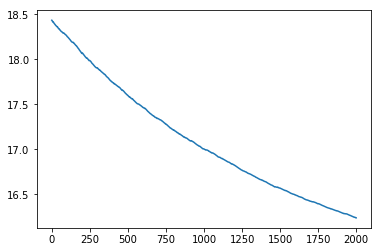

In [227]:
plt.plot([i for i in range(len(h.history["loss"]))], h.history["val_RAE"])

In [20]:
#ann2 = ResNet((2,), 2, 16, 2, 2, "relu", regularization="l2");
ann2 = ResNet((2,), 2, 128, 5, 2, keras.layers.LeakyReLU(), 'l2');
model2 = keras.Model(inputs=ann2.inputs, outputs=ann2.outputs)
model2.load_weights("./models/work_resnet1__")
#model2.compile(optimizer="Adam", loss="mse", metrics=['mae',RelativeApproximationError()])
#model_load = keras.models.load_model("./models/resnet/591-0.00.hdf5")
model2.summary()

W1214 22:31:18.055561  9636 deprecation.py:506] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          384         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          16512       dense_1[0][0]                    
______________________________________________________________________________________________

In [22]:
model = model2

In [249]:
tf.keras.callbacks.ModelCheckpoint?

In [118]:
np.max(X)

5.355412340221959

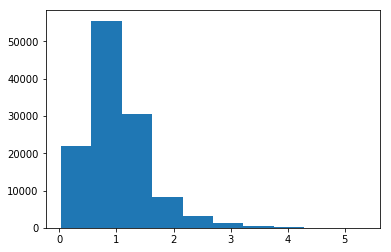

In [116]:
H = plt.hist(X[:, 0])

In [314]:
model.fit?

In [18]:
H

([array([2.022e+03, 5.105e+03, 3.193e+03, 1.069e+03, 4.620e+02, 2.200e+02,
         7.700e+01, 2.100e+01, 1.400e+01, 2.000e+00]),
  array([4.567e+03, 4.708e+03, 1.658e+03, 6.330e+02, 3.400e+02, 1.870e+02,
         5.200e+01, 2.500e+01, 1.300e+01, 2.000e+00])],
 array([9.77791195e-04, 1.00880012e-01, 2.00782233e-01, 3.00684454e-01,
        4.00586675e-01, 5.00488896e-01, 6.00391116e-01, 7.00293337e-01,
        8.00195558e-01, 9.00097779e-01, 1.00000000e+00]),
 <a list of 2 Lists of Patches objects>)

# Плотность распределения значений в обучающей выборке

In [41]:
def lotka_voltera(t, var, alpha, betta, delta, gamma):
    x, y = var
    dx = alpha*x -betta*x*y
    dy = delta*x*y - gamma*y
    return [dx, dy]

In [55]:
y0 = [0.4, 0.25]
t_span = (0, 20)
alpha = 2/3
betta = 4/3
delta = 1
gamma = 1
args = (alpha, betta, delta, gamma)
solve = integrate.solve_ivp(lotka_voltera, t_span, y0, args=args, rtol=1e-10)

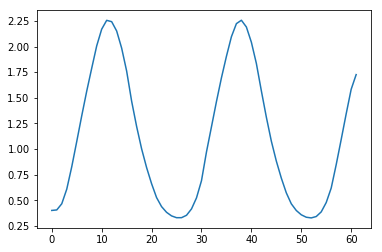

In [56]:
plt.plot(solve.y[0])

([array([1.0248e+04, 2.7507e+04, 1.6000e+04, 4.3950e+03, 1.5970e+03,
         6.4100e+02, 2.0900e+02, 6.0000e+01, 2.3000e+01, 7.0000e+00]),
  array([4.0756e+04, 1.6559e+04, 2.5430e+03, 6.8400e+02, 1.2100e+02,
         2.2000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])],
 array([3.34354854e-03, 5.37473878e-01, 1.07160421e+00, 1.60573454e+00,
        2.13986487e+00, 2.67399519e+00, 3.20812552e+00, 3.74225585e+00,
        4.27638618e+00, 4.81051651e+00, 5.34464684e+00]),
 <a list of 2 Lists of Patches objects>)

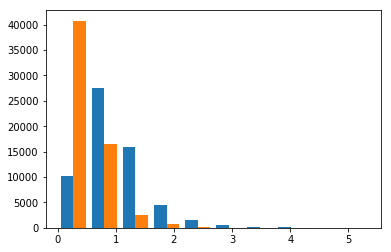

In [47]:
plt.hist(X)

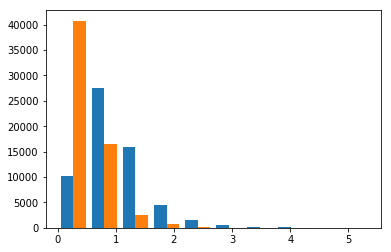

In [48]:
plt.hist(X)
plt.savefig("train_distribution.pdf")

In [143]:
keras.models.save_model(model, "./models/work_resnet1", save_format="h5")


# Генерация и обучение моделей

In [131]:
type(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 32)           96          input_7[0][0]                    
__________________________________________________________________________________________________
dense_43 (Dense)                (None, 32)           1056        dense_42[0][0]                   
__________________________________________________________________________________________________
dense_44 (Dense)                (None, 32)           1056        dense_43[0][0]                   
____________________________________________________________________________________________

NoneType

In [134]:
# model_descriptor = {
#     "type": "resnet",
#     "nunits": int число нейронов в слое,
#     "block_size": int число слоев в res блоке,
#     "nblocks": int число блоков,
#     "activation": str функция активации,
#     "ninputs": int размерность входа,
#     "noutputs": int размерность выхода
# }

modles = []
nunits = [16, 32, 64, 128, 256]
block_size = [2, 3, 4]
nblocks = [1, 2, 3, 4, 5]
activation = ['relu', 'softplus', '']

'MODEL_name{resnet}_nlayers{12}_nunits{128}'

In [137]:
keras.layers.LeakyReLU()

In [148]:
ResNet?